## AIRLINES RATING BASED ON THE SKYTREX REVIEWS

Positive reviews are becoming more important in any industry, since an increasing number of customers are basing their purchase decision on them. The airline industry is no different. Airlines are putting in a lot of effort to offer good value without overextending on the business cost. Understanding customer feedback is an important component of that, but offers only a snapshot of the current situation. Can we glean from the data what some of the aspects that influence the rating a traveller leaves are? 

The original dataset contained reviews for 362 airlines, with 41396 entries and 20 columns - some of which are integers for reviewing different aspects of the services, some traveller information, and one plain text field. We decided to only use airlines that have at least 100 reviews to ensure that there is enough data to draw any conclusions, which in our case is 112 airlines. Between these airlines there are large differences in the number of reviews, for example Spirit airlines has 990 reviews, which is an order of magnitude more than the lowest number we have chosen. After filtering out the airlines with fewer than 100 review, we are left with 35609 rows and 20 columns, which is around 29,1 MB.


Here are some of the questions we wanted to gain a deeper understanding of:

    * How does the traveller type (leisure solo, couple, family, or business), and cabin flown affect the rating? Can we notice any patterns?
    * Are ratings where travellers recommend an airline connected to overall ratings?
    * Are there any differences between traveller type categories and cabin flown categories? Who will be more likely to give a better rating?
    * Does the traveller’s country of origin influence the rating?
    * Is there a connection between value_money rating and the overall or recommend rating?


In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
sns.set(color_codes=True, font_scale=1.25)

In [2]:
# import data
data_112_airlines = pd.read_csv('Data_rating_112_airlines.csv')

In [3]:
# check the first few rows
data_112_airlines.head()

,airline_name,link,title,author,author_country,date,content,aircraft,type_traveller,cabin_flown,route,overall_rating,seat_comfort_rating,cabin_staff_rating,food_beverages_rating,inflight_entertainment_rating,ground_service_rating,wifi_connectivity_rating,value_money_rating,recommended
0,aegean-airlines,/airline-reviews/aegean-airlines,Aegean Airlines customer review,P Vlogianitis,Australia,2015-08-01,"Flight to Larnaca was a joy. Generous legroom,...",A321,FamilyLeisure,Business Class,Athens to Larnaca,10.0,5.0,5.0,5.0,NaN,3.0,NaN,5.0,1
1,aegean-airlines,/airline-reviews/aegean-airlines,Aegean Airlines customer review,Eric Botha,United Kingdom,2015-07-28,"Flight on time, row 1 - Friendly staff and ver...",A321,Couple Leisure,Business Class,Athens to London,8.0,4.0,5.0,4.0,2.0,4.0,NaN,4.0,1
2,aegean-airlines,/airline-reviews/aegean-airlines,Aegean Airlines customer review,Nathan Vermeulen,Belgium,2015-07-26,Very good flight with Aegean. The boarding was...,A320-232,FamilyLeisure,Economy,Brussels to Heraklion,9.0,4.0,5.0,4.0,NaN,4.0,NaN,4.0,1
3,aegean-airlines,/airline-reviews/aegean-airlines,Aegean Airlines customer review,N Sunder,United States,2015-07-21,"Brand new A320, interior spotless. Crew immacu...",A320,Solo Leisure,Economy,Mykonos to Athens,8.0,4.0,4.0,NaN,NaN,4.0,NaN,4.0,1
4,aegean-airlines,/airline-reviews/aegean-airlines,Aegean Airlines customer review,Dimitrios Chrysos-Gklavas,Greece,2015-07-21,I booked a premium economy ticket so I can hav...,Dash 8 Q400,Solo Leisure,Economy,Athens to Santorini,8.0,4.0,5.0,4.0,NaN,2.0,NaN,3.0,1


### 1. DATA SUMMARY

To get better sense of the data, here are all included airlines and their number of reviews:

In [16]:
# return the frequency of each unique value in 'airline_name' column
entries_per_airline = data_112_airlines.groupby('airline_name').size().sort_values(ascending=False)

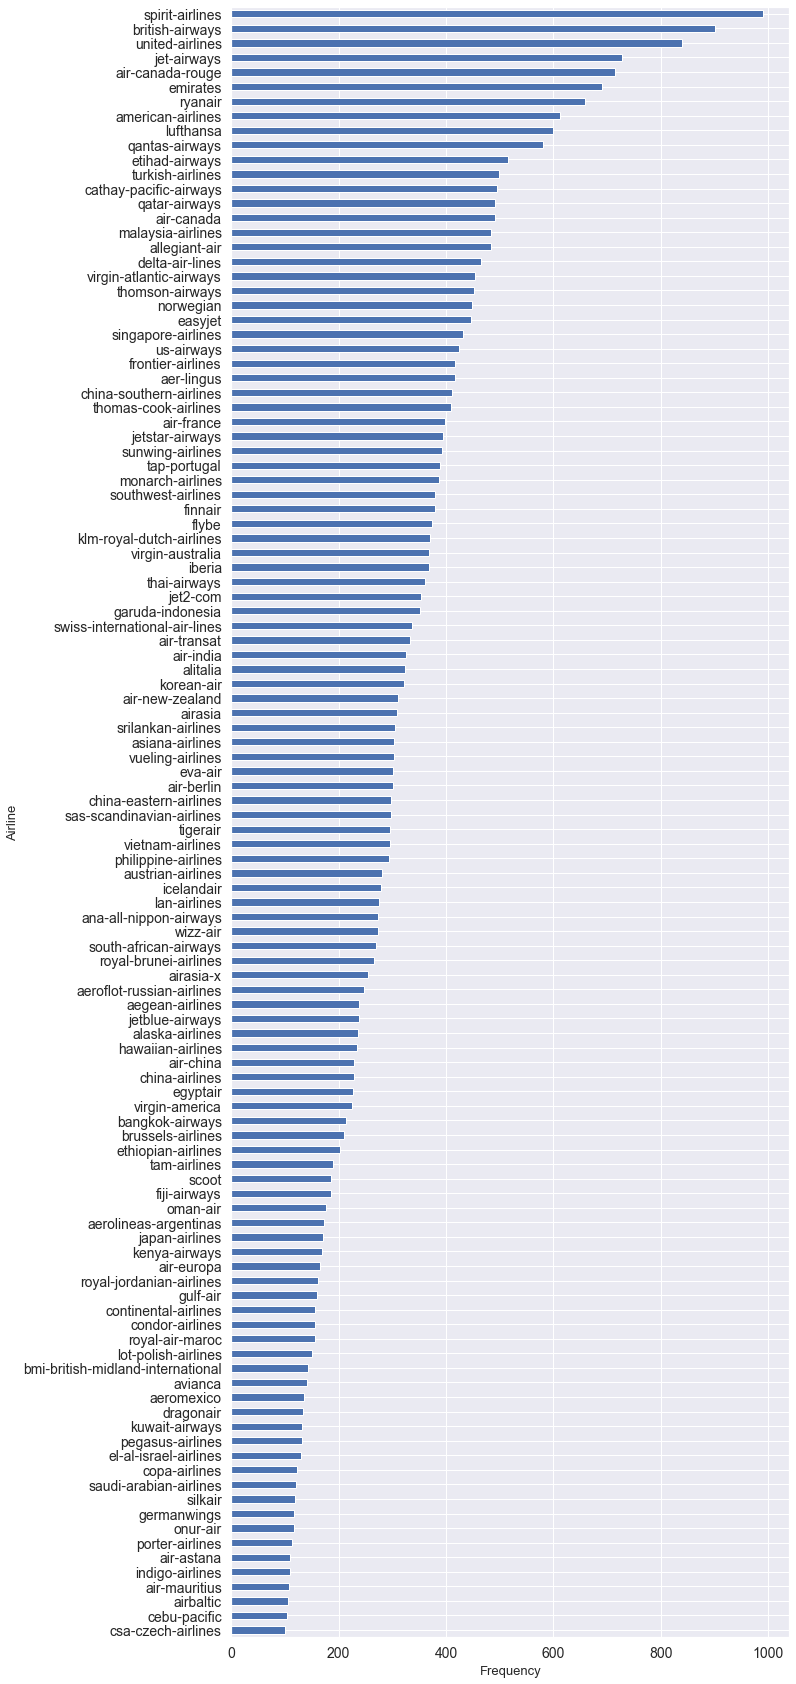

In [18]:
# create a graph for number of reviews per airline
plt.figure(figsize=(10,30))
entries_per_airline.plot.barh(fontsize=14)
plt.gca().invert_yaxis()
plt.xlabel('Frequency', fontsize=13)
plt.ylabel('Airline', fontsize=13)
plt.show()

The majority of airlines on our list have between 200 and 500 reviews.
From all the airlines on our list of 112, Spirit dominantes in the number of reviews. The popularity of the airline might be due to the ultra low cost, but that also brings them to the bottom of our list when it comes overall rating.


In [24]:
# create a dataframe for selected ratings features
ratings_various = data_112_airlines[['seat_comfort_rating', 'cabin_staff_rating', 'food_beverages_rating', 'ground_service_rating', 'inflight_entertainment_rating', 'value_money_rating']]

<Figure size 432x288 with 0 Axes>

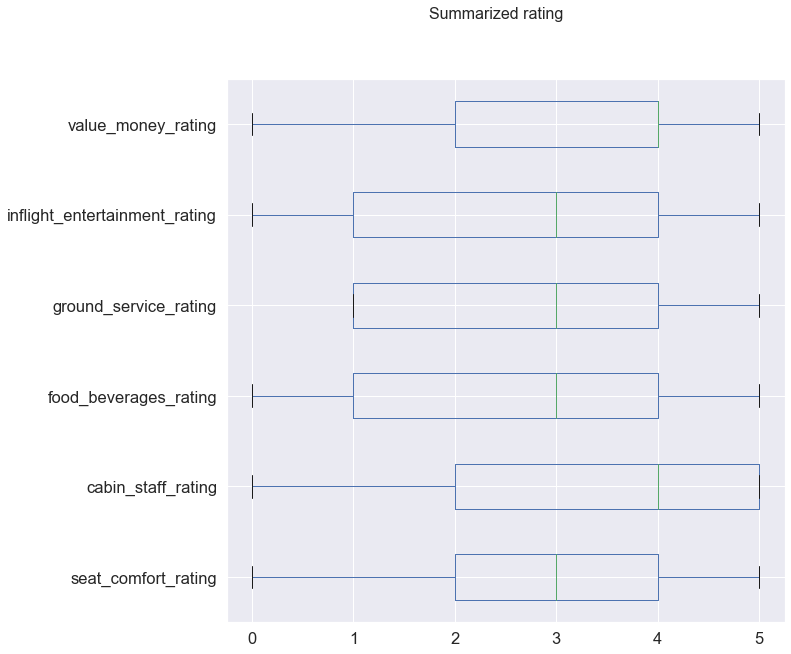

In [168]:
# create a boxplot for each rating feature
plt.figure()
ratings_various.plot.box(figsize=(10, 10), vert=False)
_ = plt.suptitle('Summarized rating', fontsize=16)
plt.show()

All features in the graph above have a rating from 0 to 5, where 0 is the worst and 5 the best. We can see that overall Cabin staff has the best rating. Inflight entertainment and Food and beverage have the worst ratings, they both have minimum rating 0 and the middle 50% of the rating is in the range between 1 and 4. Ground service has a similar range for 50% of ratings in the middle, but what is unexpected is that its minimum value is 1. 

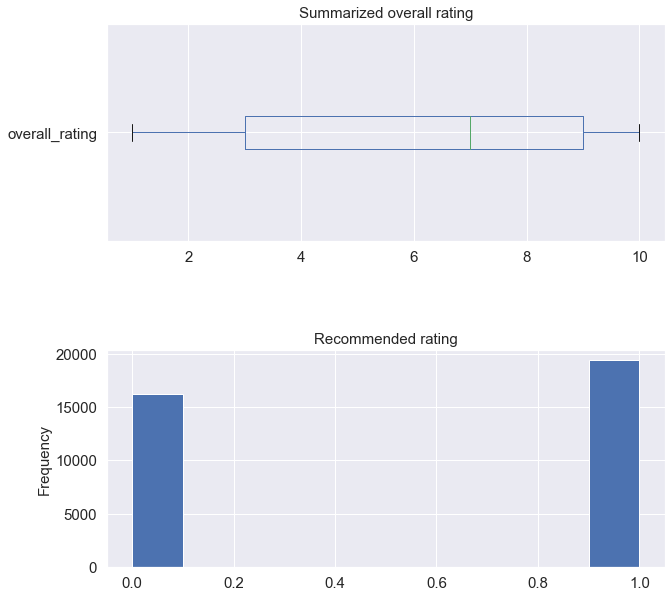

In [8]:
# create a boxplot for overall rating feature and histogram for recommended rating feature
fig, ax = plt.subplots(nrows = 2, figsize=(10, 10))
_ = data_112_airlines.overall_rating.plot.box(ax=ax[0], vert=False, title='Summarized overall rating', fontsize=15)
_ = data_112_airlines.recommended.plot.hist(ax=ax[1], title='Recommended rating', fontsize=15)
_ = plt.subplots_adjust(hspace = 0.5)
plt.show()

Overall rating has values between 1 and 10, where 1 is the worst and 10 the best. These two values also represent minimum and maximum ratings. And the 50% of ratings is between 3 and 9, with the mediana at 7. From this we can assume that travellers have an overall good experience. Let's see if that means that they would recommend it to others as well.

From the Recommended rating histogram, we can see there are more ratings at value 1 than at value 0, which means more travellers recommend an airline they flew with and we can assume that they were overall satisfied with their experience.


### 2. RATING BASED ON THE CABIN FLOWN/FLIGHT CLASS 

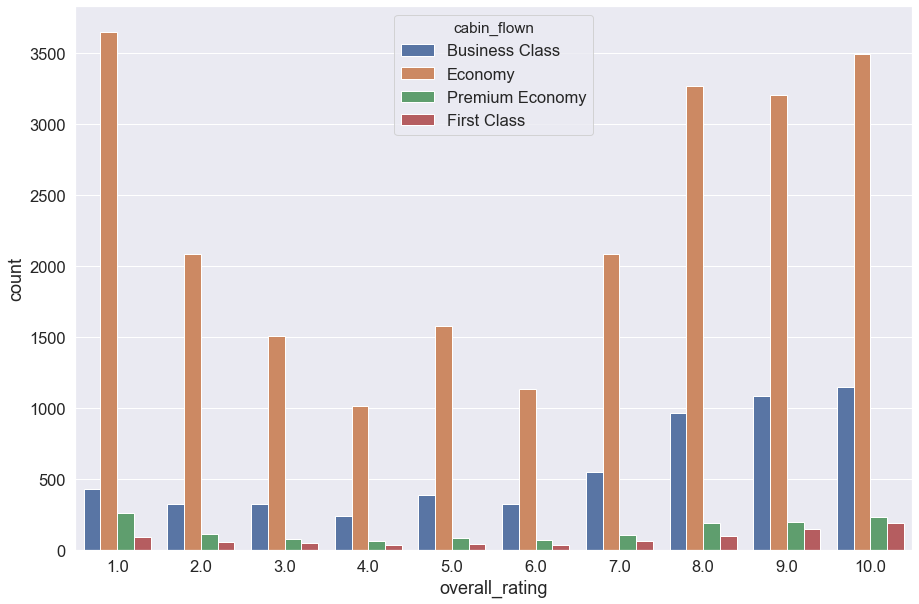

In [95]:
# plot number of overall rating for each flight class
sns.set(font_scale=1.5)
plt.figure(figsize=(15, 10))
_ = sns.countplot(x='overall_rating', hue='cabin_flown', data=data_112_airlines)
plt.show()

The above graph shows the distribution of the data for Overall rating. What we can see there are the most ratings for Economy class and the least for First class. Which is no surprise, since the Economy class has more seats available per flight than First class, if there even is a First class available. We can also notice a similar pattern occurring across all the classes, with a lot of ratings between 8 and 10, a dip in the middle and a peak at 1. Premium economy ratings follow closer to Economy class, while First class are similar to Business class ratings. Which all makes sense.

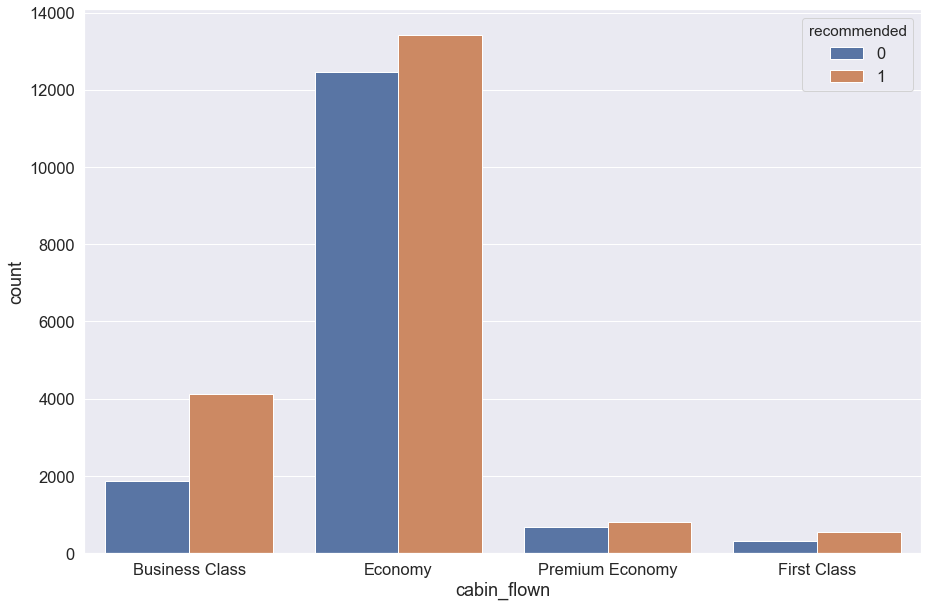

In [27]:
# plot recommended rating based on the cabin flown
sns.set(font_scale=1.5)
plt.figure(figsize=(15, 10))
_ = sns.countplot(x='cabin_flown', hue='recommended', data=data_112_airlines)
plt.show()

This graph shows us the recommended rating for each flight class. By looking at this graph we can see that there were more travellers that recommended their airline compared to those who didn't recommend it. Especially for Business class there were twice as many for recommendation than not. From this we can assume that travellers in Business class have overall the best experience and are the most satisfied. 

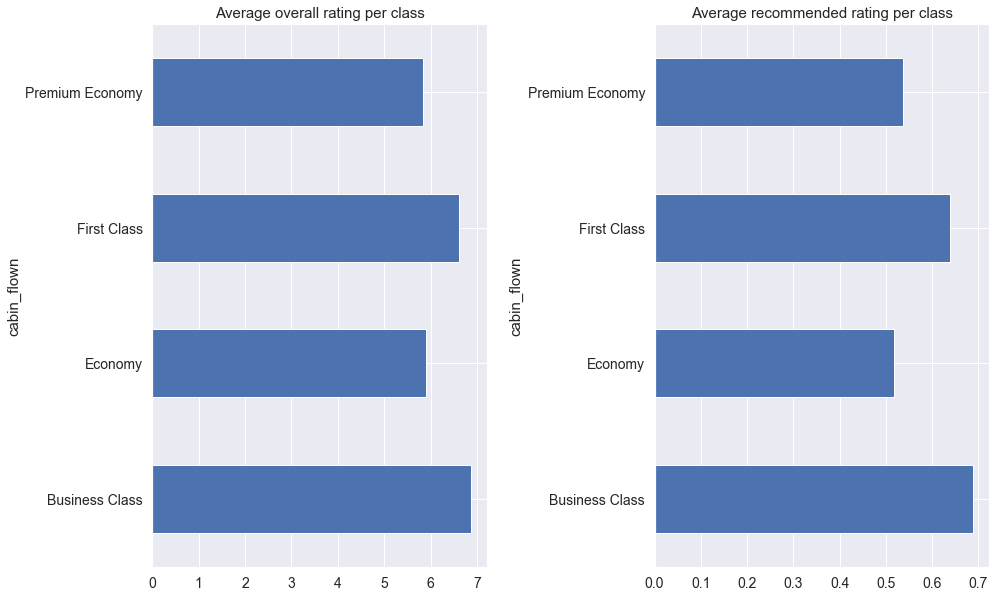

In [43]:
# plot average overall rating and recommended rating based on the cabin flown
fig, ax = plt.subplots(ncols = 2, figsize=(15, 10))
data_112_airlines.groupby('cabin_flown')['overall_rating'].mean().plot.barh(ax=ax[0], fontsize=14, title='Average overall rating per class')
data_112_airlines.groupby('cabin_flown')['recommended'].mean().plot.barh(ax=ax[1], fontsize=14, title='Average recommended rating per class')
plt.subplots_adjust(wspace = 0.5)
plt.show()

Looking at these two graphs above we can see that Business class has the highest average overall rating as well as average recommended rating, but First class is not far behind. As expected Economy and Premium Economy flight classes have the lowest average rating.

### 3. RATING BASED ON THE TRAVELLER TYPE

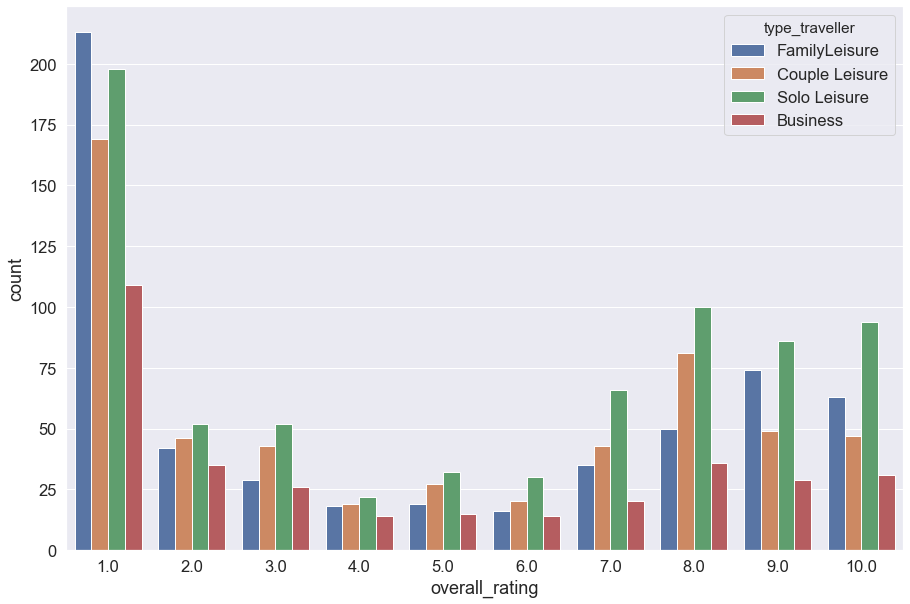

In [97]:
# plot number of reviews per traveller type
plt.figure(figsize=(15,10))
_ = sns.countplot(x='overall_rating', hue='type_traveller', data=data_112_airlines)
plt.show()

The above graph shows us the distribution of the overall rating for each traveller type. We can see that each traveller type has the most rating for value 1, which means they weren't satisfied with their flight. It is interesting to see that the lowest number of ratings have values 4, 5 and 6. From this we can assume that travellers are not indecisive, and have a strong sense if they had good or bad experience.

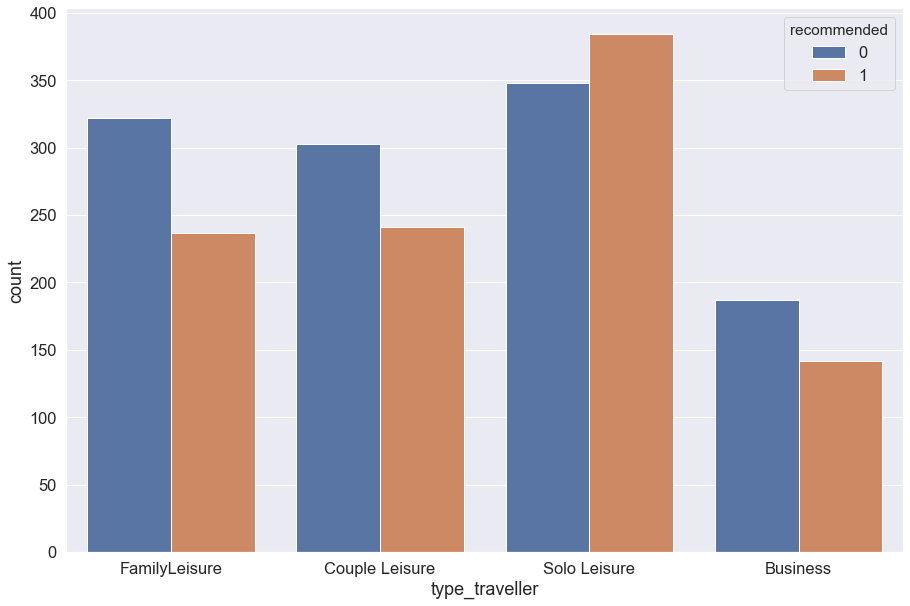

In [98]:
# number of recommended rating based on a traveller
plt.figure(figsize=(15, 10))
_ = sns.countplot(x='type_traveller', hue='recommended', data=data_112_airlines)
plt.show()

The above graph shows recommended ratings for each traveller type. It is a surprise to see that only for travellers that travel individually there are more recommended ratings with yes then no. For other types of travellers there are more ratings that would not recommend the airlines they flew with.

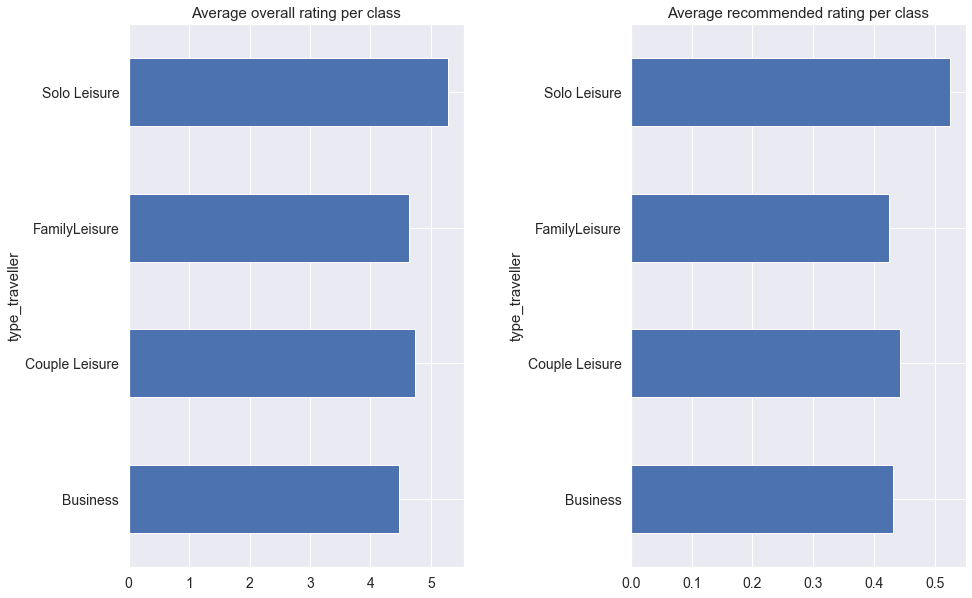

In [44]:
# check traveller type with the average overall review
fig, ax = plt.subplots(ncols = 2, figsize=(15, 10))
data_112_airlines.groupby('type_traveller')['overall_rating'].mean().plot.barh(ax=ax[0], fontsize=14, title='Average overall rating per class')
data_112_airlines.groupby('type_traveller')['recommended'].mean().plot.barh(ax=ax[1], fontsize=14, title='Average recommended rating per class')
plt.subplots_adjust(wspace = 0.5)
plt.show()

From the above two graphs we can see that Solo type travellers on average gave a higher overall rating and recommended rating than the rest of traveller types. This might be due to not paying attention to details, have no one else with them to worry about. And travellers who travel for a business purpose give on average the lowest ratings.

### 4. RATING BASED ON CABIN FLOWN AND TRAVELLER TYPE

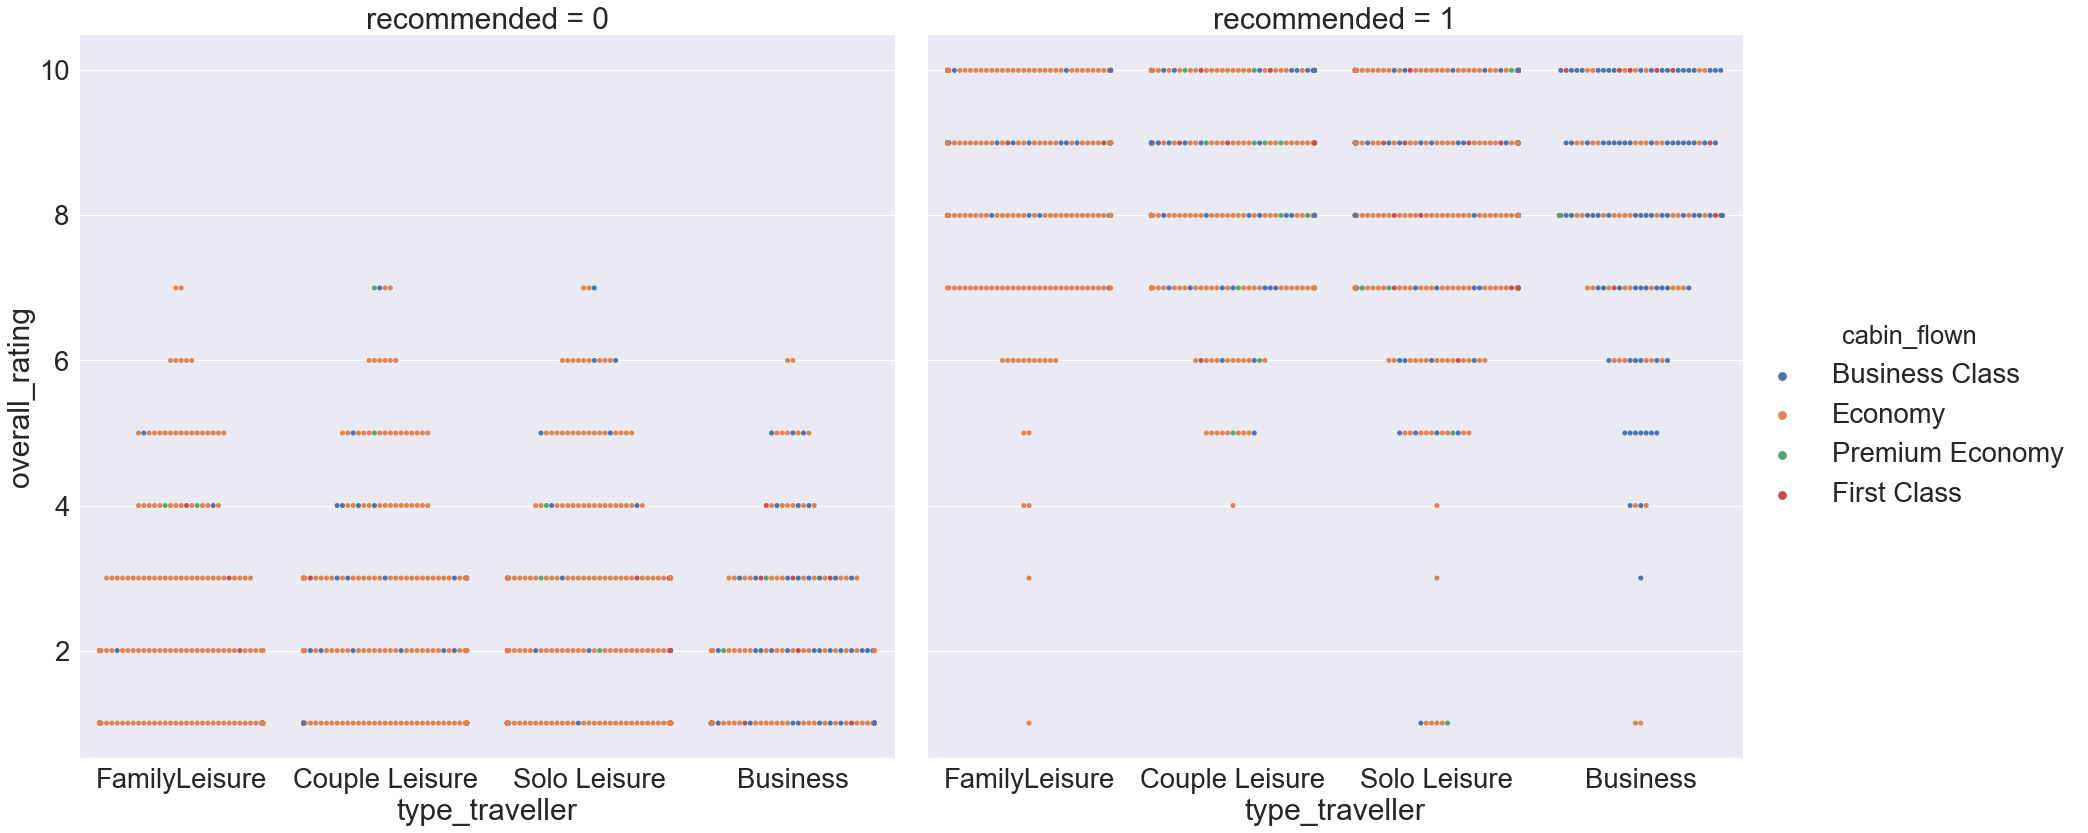

In [61]:
# plot recommended and overall rating based on the flight class and traveller type
#plt.figure()
sns.set(font_scale=2)
_  = sns.catplot(x='type_traveller', y='overall_rating', hue='cabin_flown', col='recommended', kind='swarm', data=data_112_most_entries, height=12)
plt.show()

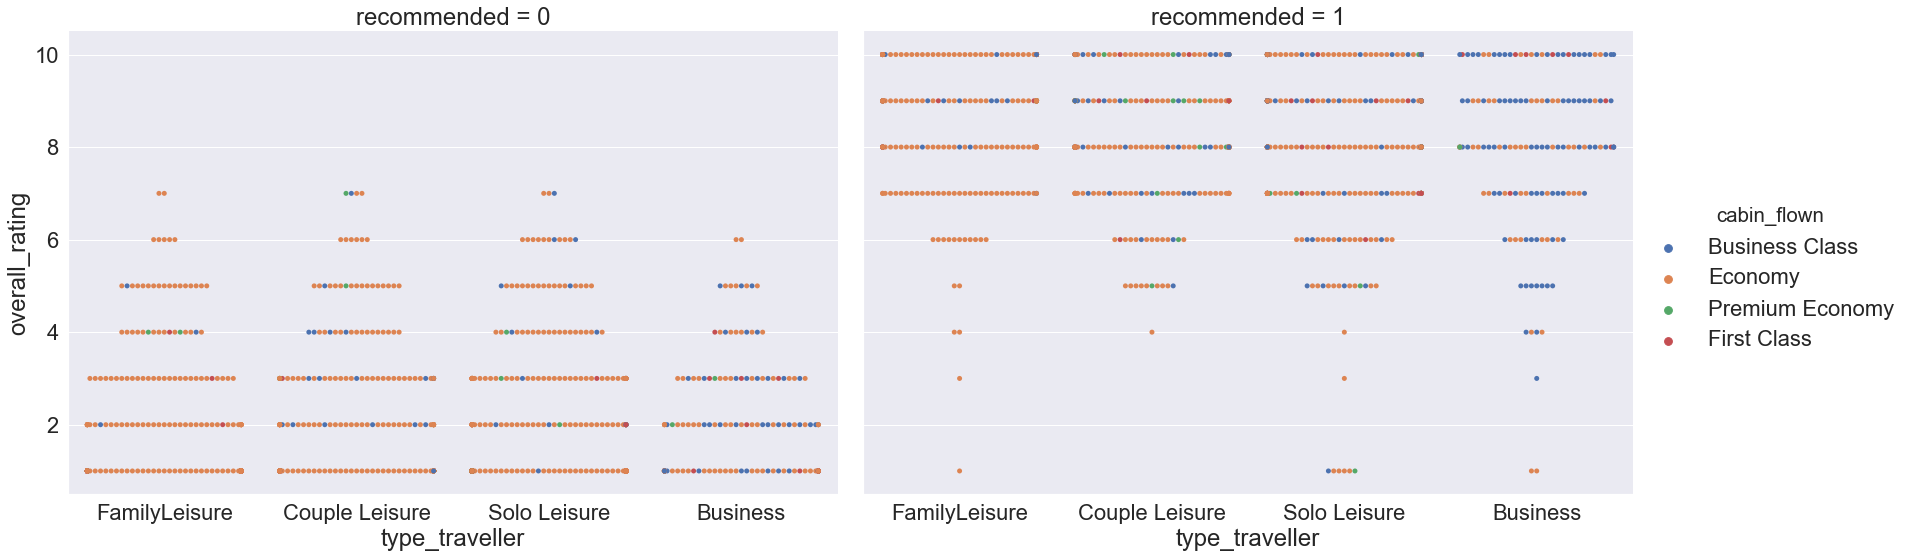

In [85]:
# plot recommended and overall rating based on the flight class and traveller type
#plt.figure(figsize=(20, 20))
sns.set(font_scale=2)
_  = sns.catplot(x='type_traveller', y='overall_rating', hue='cabin_flown', col='recommended', kind='swarm', data=data_112_airlines, height=8.27, aspect=11.7/8.27)
plt.show()

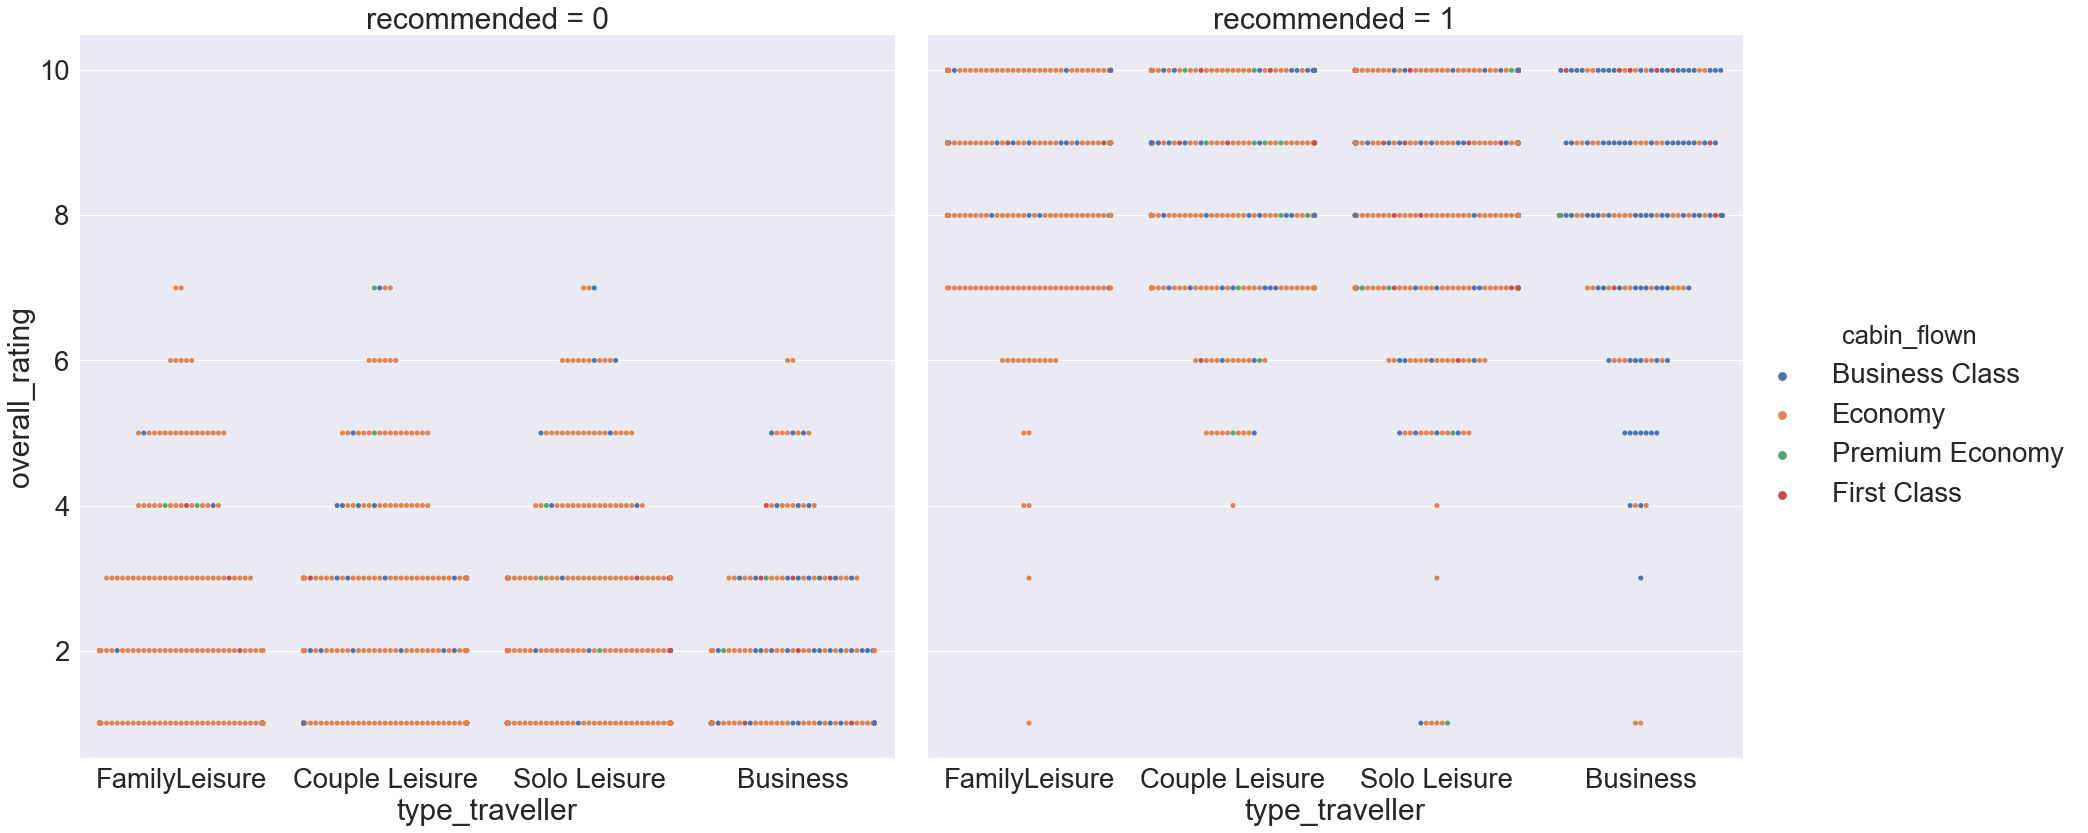

In [86]:
# plot recommended and overall rating based on the flight class and traveller type
sns.set(font_scale=2.5)
_  = sns.catplot(x='type_traveller', y='overall_rating', hue='cabin_flown', col='recommended', kind='swarm', data=data_112_airlines, height=12.27, aspect=18.7/18.27)
plt.show()

The above graphs shows the Overall and recommended rating distribution based on the cabin flown and traveller type. In general traveller would not recommended airline if they gave an overall rating of 5 or below. On the other hand if they rate with 7 or more they would recommend an airline. If we look at each group, we can see that Families, Couples and Individuals usually travel in Economy class.

Travellers who are travelling for business purposes usually travel in Business class. For Business travellers we can see that when they travel in Business class they are more satisfied with the flight/airline and give higher ratings in comparison to when they travel in Economy class. 

In the “recommended = 1” graph we can notice that there are a few ratings with an overall value lower than 5, these points might be outliers.


<Figure size 1080x720 with 0 Axes>

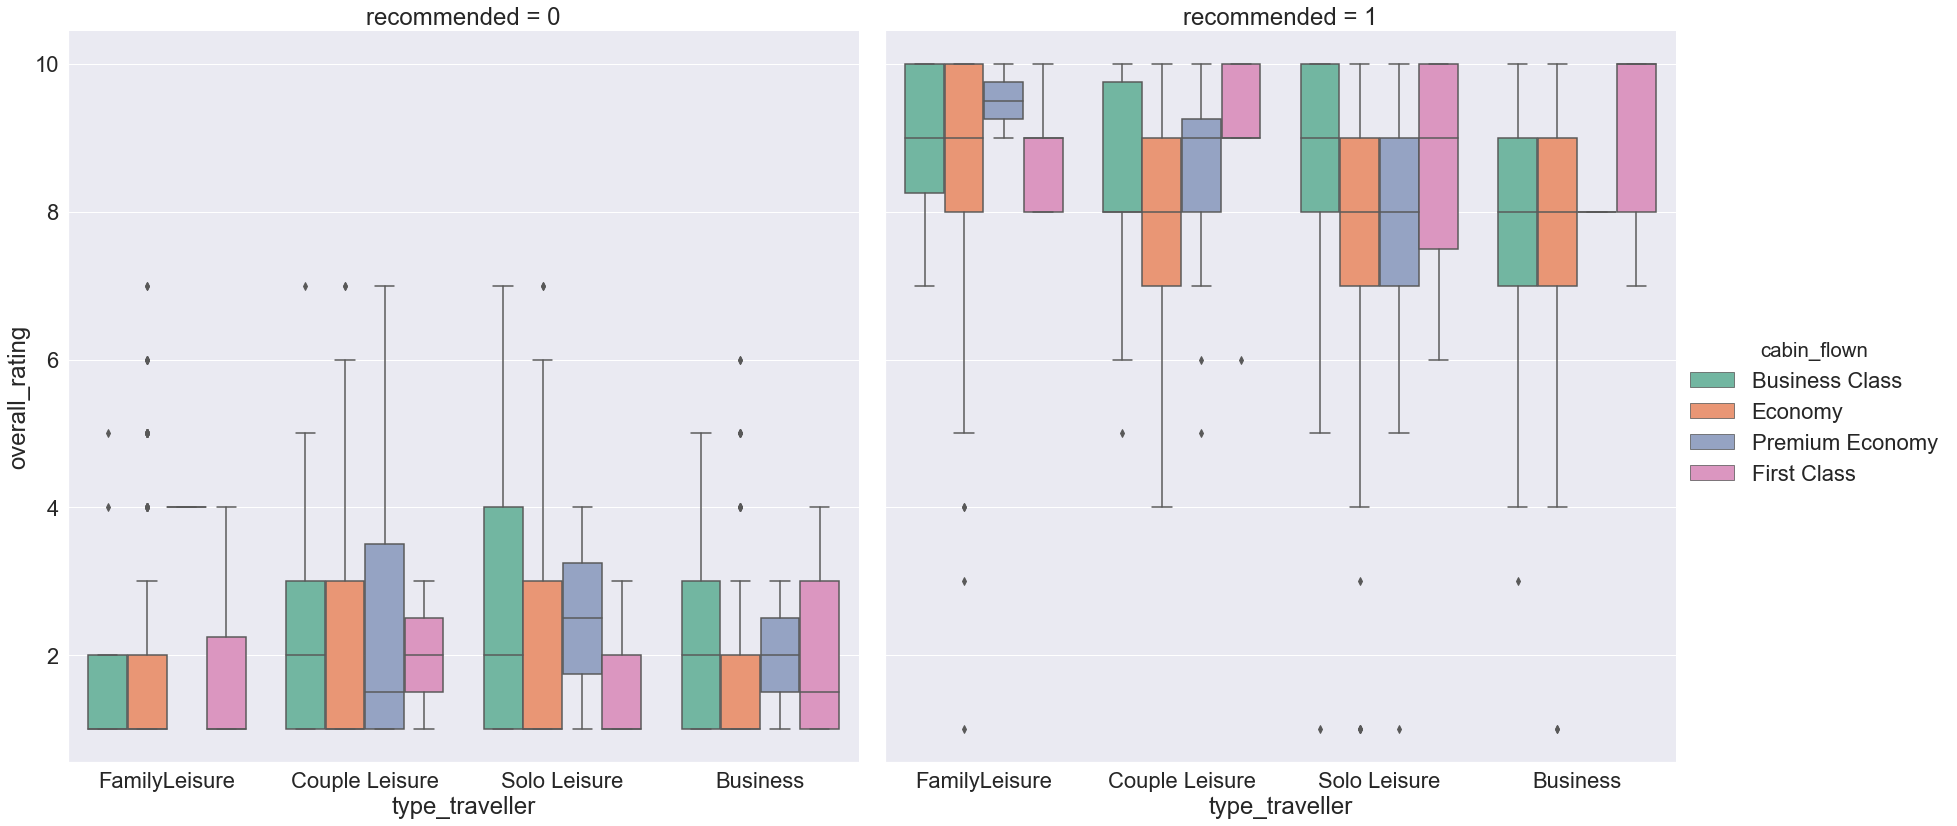

In [159]:
# boxplot for recommended and overall rating based on the flight class and traveller type
sns.set(font_scale=2)
plt.figure(figsize=(15, 10))
_ = sns.catplot(x='type_traveller', y='overall_rating', hue='cabin_flown', col='recommended', kind='box', data=data_112_airlines, palette='Set2', height=12);

These two graphs complement the above ones. If we look at the left one, we can see that there is no box for Premium Economy in FamilyLeisure group, just one short line at value 4. Now if we look at the above graph on the left we can see there are no values lower than 4 for Premium Economy in this group and those two green dots in the above graph represent this line at value 4. There is a similar story for Business travellers in Premium Economy that have recommended the airline. 

We can notice that the range for rating is the smallest for Family travellers. They usually don’t recommend airline if they give overall rating 2 or lower and would recommend for an overall rating higher than 8. It is interesting to see that Couples and Solo travellers have high maximum values for not recommending an airline at value 7. At the same time these two groups also have the lowest minimum value for overall rating at which they would recommend an airline. 

Another thing we can see is that travellers in Premium economy would never give overall ratings at 10. For First class we can see that only Family travellers don’t give overall rating 10. There are also few separate dots, which can be seen in the previous two graphs and are probably outliers. It doesn’t make sense to give an overall rating of 1 and then recommend the airline.


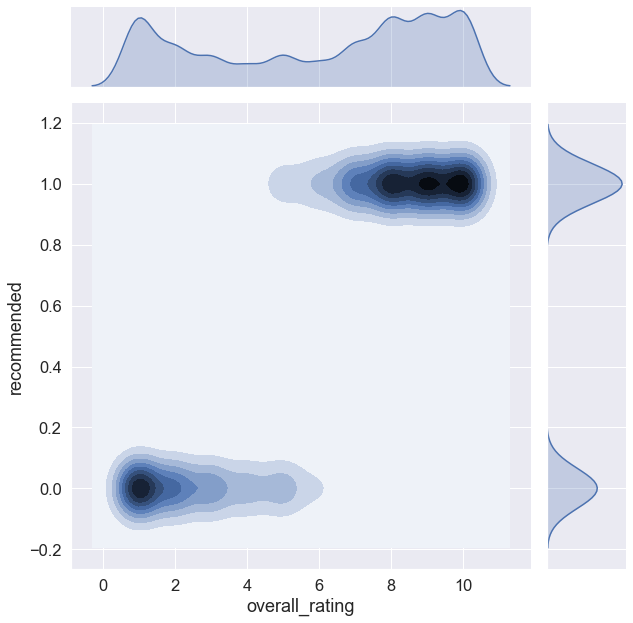

In [90]:
# plot kernel density estimation between overall rating and recommended
sns.set(font_scale=1.5)
sns.jointplot(x='overall_rating', y='recommended', data=data_112_airlines, kind='kde', height=9);

This graph shows us the relationship between overall ratings and recommended ratings. We can see that the limit is at the overall rating value of 6. travellers wouldn’t recommend an airline when they gave overall rating closer to value 1, where the highest density of number of not recommended ratings lies. On the other hand, travellers who gave an overall rating of at least 7, would recommend an airline.  For recommendation, there are two densities at values 9 and 10 for overall rating. 

### 5. RATING BASED ON THE PASSENGER'S COUNTRY

In [33]:
# check number of overall rating for each country
country_count = data_112_airlines.groupby('author_country')['overall_rating'].count().sort_values(ascending=False)
country_count

author_country
United Kingdom    7922
United States     6741
Australia         4363
Canada            2716
Germany            949
                  ... 
Mauritania           1
Senegal              0
Cameroon             0
Azerbaijan           0
Liechtenstein        0
Name: overall_rating, Length: 147, dtype: int64

In [36]:
# create a list of 15 countries with the highest number of reviews
countries_15 = list(country_count.head(15).index)

# create a dataframe for top 15 countries based on the number of reviews
top_countries_15_reviews = data_112_airlines.loc[data_112_airlines['author_country'].isin(countries_15)]

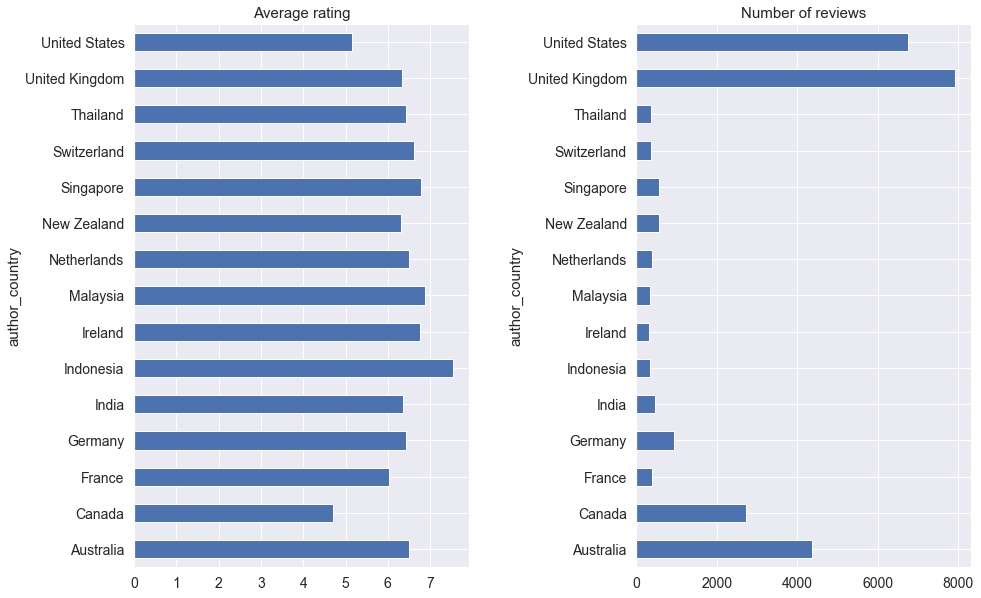

In [38]:
# plot number of overall reviews and average overall rating per country
fig, ax = plt.subplots(ncols = 2, figsize=(15, 10))
top_countries_15_reviews.groupby('author_country')['overall_rating'].mean().plot.barh(ax=ax[0], fontsize=14, title='Average rating')
top_countries_15_reviews.groupby('author_country')['overall_rating'].count().plot.barh(ax=ax[1], fontsize=14, title='Number of reviews')
plt.subplots_adjust(wspace = 0.5)
plt.show()

By looking at the right graph first, we could group countries in 3 groups by number of reviews for easier comparison. The USA and UK in one, AUS and CAN in second and the rest in third. We can see that countries with number of reviews lower than 2000 have high average Overall rating. On the other hand the UK is not far behind, even though it has the highest number of reviews. It is unexpected to see that travellers from Canada aren't satisfied with their flight experience compared to the others.

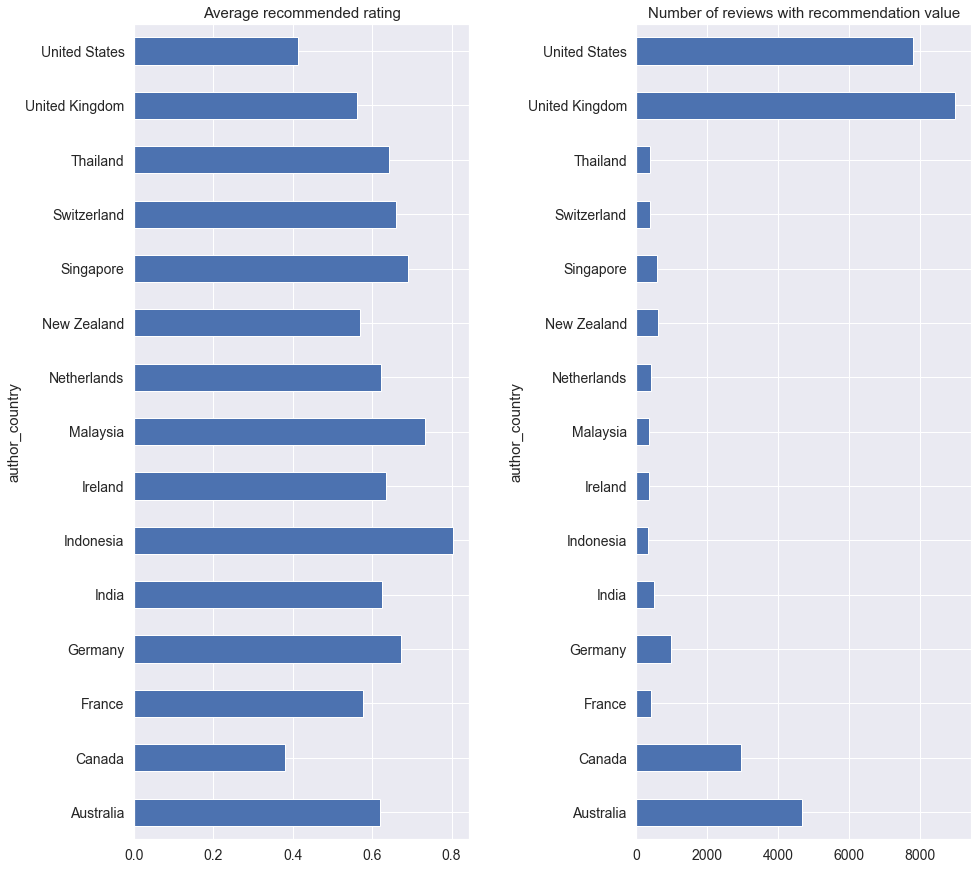

In [46]:
# plot a graph for average recommended rating and number of recommendations for top 15 countries from where reviews came
fig, ax = plt.subplots(ncols = 2, figsize=(15, 15))
top_countries_15_reviews.groupby('author_country')['recommended'].mean().plot.barh(ax=ax[0], fontsize=14, title='Average recommended rating')
top_countries_15_reviews.groupby('author_country')['recommended'].count().plot.barh(ax=ax[1], fontsize=14, title='Number of reviews with recommendation value')
plt.subplots_adjust(wspace = 0.5)
plt.show()

In this two graphs we can see a similar pattern as above. Travellers from Canada are on average less likely to recommend their airline then the rest. Travellers from the countries with less than 2000 reviews are more likely to be recommending. And the UK is not that far away, taking into consideration that it has the highest number of reviews.

Out of curiosity, let's check how did travellers rate value for money.

### 6. RATING BASED ON THE VALUE FOR MONEY

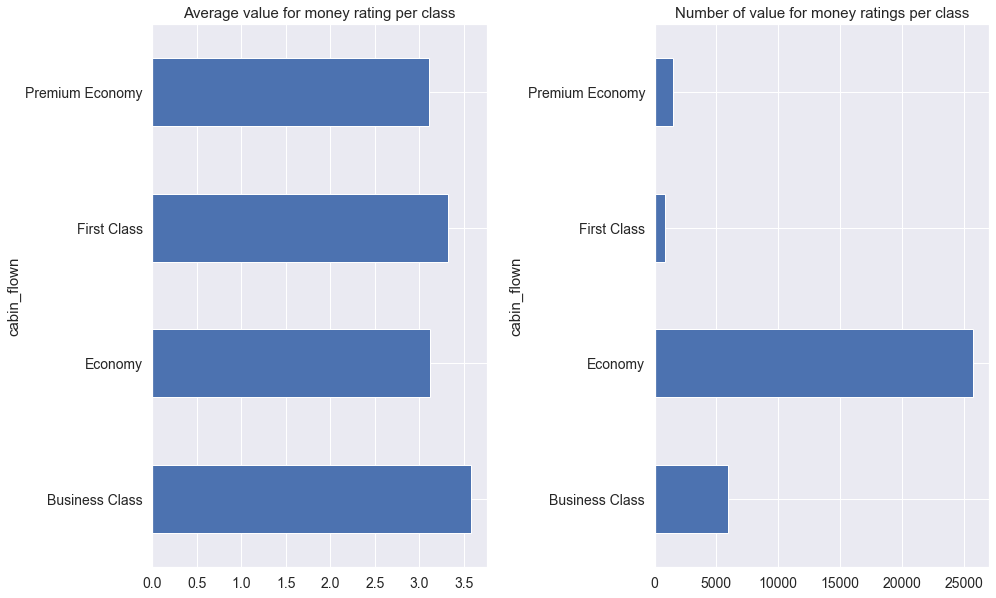

In [11]:
# check traveller type with the average overall review
fig, ax = plt.subplots(ncols = 2, figsize=(15, 10))
data_112_airlines.groupby('cabin_flown')['value_money_rating'].mean().plot.barh(ax=ax[0], fontsize=14, title='Average value for money rating per class')
data_112_airlines.groupby('cabin_flown')['value_money_rating'].count().plot.barh(ax=ax[1], fontsize=14, title='Number of value for money ratings per class')
plt.subplots_adjust(wspace = 0.5)
plt.show()

By looking at the above two graphs seems that travellers flying in Business class get better value for money. As expected, in Economy class travellers on average gave the lowest value for money rate.

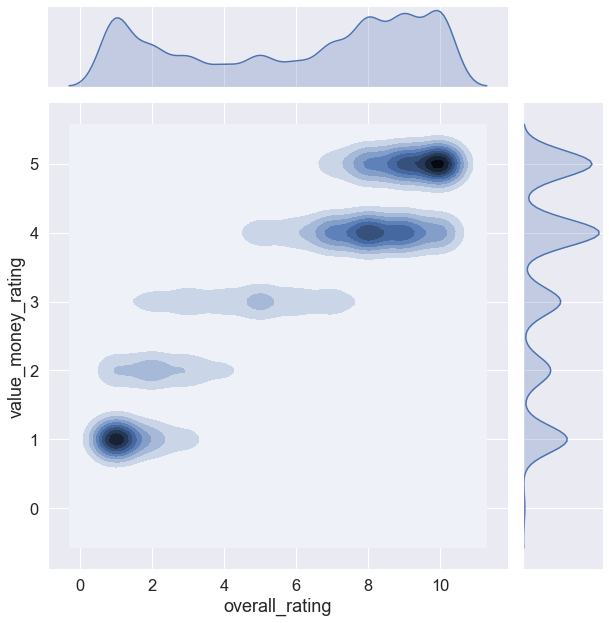

In [92]:
# plot kernel density estimation between overall rating and value for the money
sns.jointplot(x='overall_rating', y='value_money_rating', data=data_112_airlines, kind='kde', height=9);

From this graph we can see the relationship between the overall rating and value for money rating. For each “value for money” rating we can see one density area that belongs to the overall rating. traveller who give 1 for “money for value”, often gave overall rating value of 1. When they gave 10 for the overall rating, then the “value for money” rating is at 5.

We can also observe that there is a high density around value 1 for overall rating and then again between 8 and 10. Similar goes for the “value for money” density graph on the right side. The highest density of ratings are at value 4 and 5 and then again at 1 for low ratings. Since there are not many ratings in the middle we can assume that travellers know if their experience was good or not. 


### 7. CONCLUSION

Overall what we have seen from the graphs and data is that travellers are overall either satisfied or very unsatisfied. Which begs the question, does this paint an accurate picture, or are only the travellers on the extremes motivated enough to leave a review? Even if we assume this to be an accurate state of things, there are so many more elements that can influence the rating. In general, travellers enjoy flying in business class, they give the highest ratings and are most likely to recommend it. It also offers the best value for money. But the was majority travels in economy class, which is somewhat still more loved than premium economy. The reason for that might be similar to why business class is overall more praised than even first class, the traveller is paying extra for a better experience that probably doesn’t live up to their expectations. 

Things that also have a measurable effect is the type of travel. Usually people who travel solo for leisure are way happier with their airlines. Compared to people travelling with families, who would not recommend an airline, even if they give it a good overall rating. Looks like travelling with others makes people a bit more miserable, even couples aren’t as happy as solo travellers. Flying for work also isn’t the most favourite thing for many, but flying in business class compared to economy makes the trip a bit more tolerable. 

And then there is the country of origin, which leaves a lot of questions. At a glance it looks like people from less developed countries leave better review ratings. Is that due to the difference in living standards, or are cultural differences at play? 

Most of the data seems mostly to make sense. The thing that sticks out is that the cabin staff receives higher ratings than food, entertainment, and seat comfort. This should give airlines a good sense of where to invest a bit more. 
